In [1]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils
import math

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("/home/maven/robot_arm_ws/src/robot_arm_description/urdf/temp.urdf", active_links_mask=[False, True, True, True, True, True, True])

In [3]:
# target_position = [ 0.0,       0.3145,   0.596394]
target_position = [ 0.5   ,   0.245  , 0.196394]
target_orientation= [0,0,0]
target_angles = [0,0,0,0,0,0,0]

In [4]:
fk=my_chain.forward_kinematics(target_angles)
print("Computed position vector : %s, original position vector : %s" % (fk[:3, 3], target_angles))
ik=my_chain.inverse_kinematics(fk[:3,3], target_orientation, orientation_mode="Z")
print("The angles of each joints are %s ", list(map(lambda r:math.degrees(r), ik.tolist())))

Computed position vector : [0.       0.3145   0.596394], original position vector : [0, 0, 0, 0, 0, 0, 0]
The angles of each joints are %s  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [5]:
computed_position= my_chain.forward_kinematics(ik)
print("Computed position vector : %s, original position vector : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable : %s" % ['%.2f' % elem for elem in computed_position[:3, 3]])

Computed position vector : [0.       0.3145   0.596394], original position vector : [0.5, 0.245, 0.196394]
Computed position (readable : ['0.00', '0.31', '0.60']


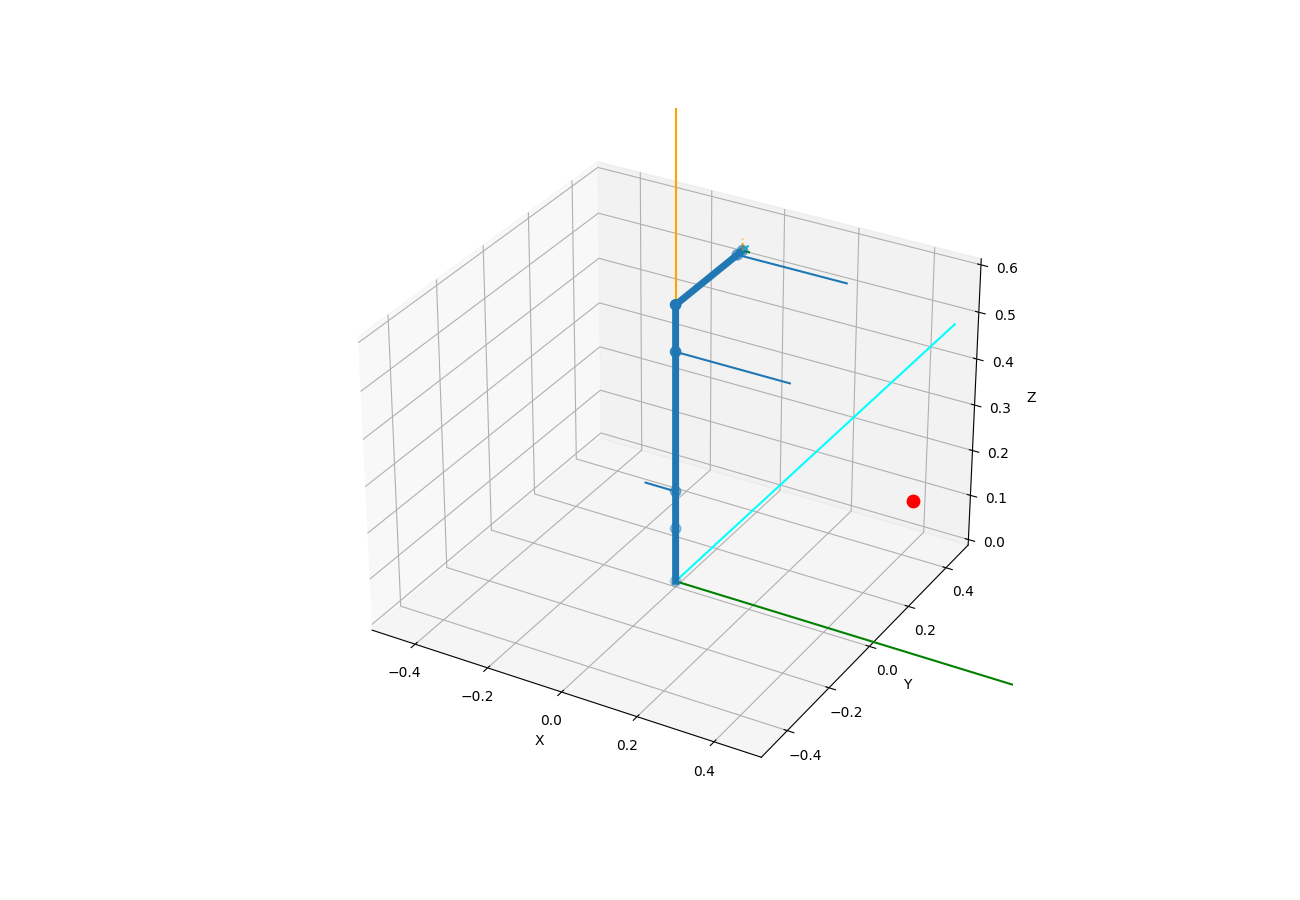

In [6]:
# Optional: support /home/maven/robot_arm_ws/src/robot_arm_description/urdf/temp.urdffor 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)
fig.set_figwidth(13)
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.6)
plt.ion()

In [103]:
import serial

arduino = serial.Serial(port='/dev/ttyUSB0', baudrate=115200, timeout=1)

def doIK():
    global ik
    old_position = ik.copy()
    ik=my_chain.inverse_kinematics(target_position, target_orientation,orientation_mode="Z")
    angles = list(map(lambda r:math.degrees(r), ik.tolist()))
    print(["%.2f" % elem for elem in angles])
    
def doFK(a,b,c,d,e,f):
    global ik
    global fk
    target_angles = [math.radians(0.0), math.radians(a),math.radians(b),math.radians(c),math.radians(d),math.radians(e),math.radians(f)]
    print(["%.2f" % elem for elem in target_angles])
    fk=my_chain.forward_kinematics(target_angles)
    print(fk)
    ik=my_chain.inverse_kinematics(fk[:3,3], target_orientation=[0,1,0])
    angles = list(map(lambda r:math.degrees(r), ik.tolist()))
    print(["%.2f" % elem for elem in angles])
    print("Computed position (readable : %s" % ['%.2f' % elem for elem in fk[:3, 3]])
    print("The angles of each joints are %s ", list(map(lambda r:math.degrees(r), ik.tolist())))
    
def updatePlot(data):
  
    
    fig, ax = plot_utils.init_3d_figure()
    my_chain.plot(ik, ax, target=target_position, show=True)
    fig.set_figheight(9)
    fig.set_figwidth(13)
    print(ik)
    my_chain.plot(data, ax, target=target_position)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    ax.set_zlim(0.0, 0.6)
    plt.ion()
    ax.legend()

def move(x,y,z,r1,r2,r3):
    global target_position
    global target_orientation
    global ik
    target_position = [x,y,z]
    target_orientation= [r1,r2,r3]
    doIK()
    updatePlot(ik)
                                    
def moveFK(a,b,c,d,e,f):
    global fk
    doFK(a,b,c,d,e,f)
    updatePlot(fk)
                                    

def sendCommand(command):
    print(command.encode('ascii'))
    arduino.write(command.encode('ascii'))
    
def moveJoints(a,b,c,d,e,f,g):
    command = '{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}\r\n'.format(math.degrees(a),math.degrees(b),math.degrees(c),math.degrees(d),math.degrees(e),math.degrees(f),math.degrees(g))
    sendCommand(command)
    
def goHome():
    sendCommand("HOME\r\n")
    
def goInit():
    command = '{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}\r\n'.format(0.0,-55.0,-87.0,0.0,0.0,0.0,0.0)
    sendCommand(command)

In [118]:

goInit()

b'0.00,-55.00,-87.00,0.00,0.00,0.00,0.00\r\n'


In [81]:
goHome()

b'HOME\r\n'


['0.00', '0.00', '21.92', '-16.24', '-0.00', '-51.84', '0.00']


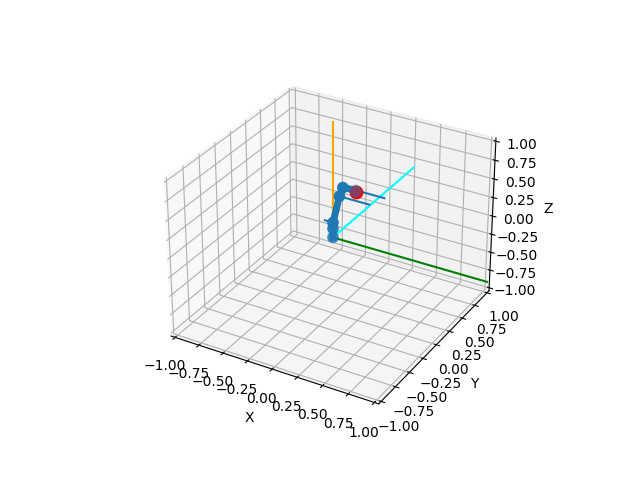

[ 0.00000000e+00  4.95697080e-07  3.82599446e-01 -2.83408246e-01
 -4.99939665e-06 -9.04765055e-01  3.59882597e-06]
b'0.00,21.92,-16.24,-0.00,-51.84,0.00,0.00\r\n'
['0.00', '-26.99', '30.11', '-4.58', '11.24', '-53.78', '6.10']


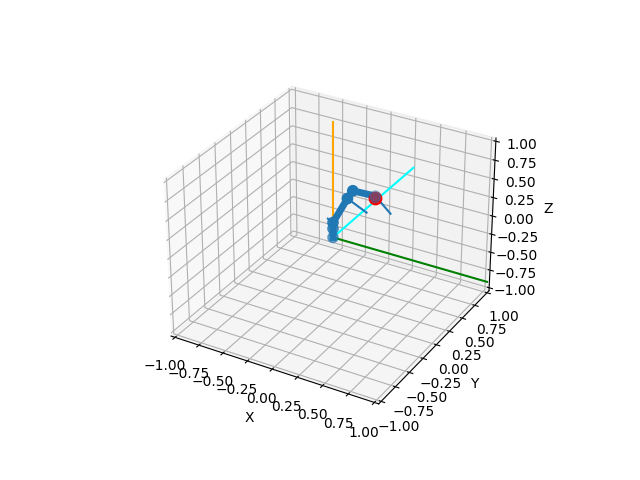

[ 0.         -0.4709773   0.52546156 -0.07997632  0.19610437 -0.93872292
  0.10637854]
b'-26.99,30.11,-4.58,11.24,-53.78,6.10,0.00\r\n'


In [117]:
# move(0.0,       0.3145,   0.596394,0,0,0) # HOME


move(0.0,       0.40,   0.35,0,math.pi,0)
# moveFK(0, 0, 90, 90, 90, 0)
moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),0)
move(0.2,       0.40,   0.35,2.6,math.pi,0)
moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),0)

# goHome()
# goInit()
# move(0.2    ,   0.6145  , 0.196394,0,0,0)